In [52]:
import ROOT
import sys
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append("../utils/")
import read_ROOT_hists
import read_integral_hdf5s

In [3]:
import importlib
importlib.reload(read_ROOT_hists)

<module 'read_ROOT_hists' from '/storage/af/user/aalbert/SM_QAQC_Results/Plotting_Scripts/../utils/read_ROOT_hists.py'>

### Test Averaged LY, SRC Charge, and SPE Charge Results (from ROOT Files)

In [4]:
module_str = "32110020008497"

In [35]:
TFileList = read_ROOT_hists.get_TFiles(minRunNum=280, maxRunNum=315)

In [36]:
len(TFileList)

23

In [37]:
c = ROOT.TCanvas()
pad = ROOT.gPad.DrawFrame(-1, 2.5, 16, 4.5)
pad.SetTitle(f"Test-Averaged SPE Charge  - Module {module_str};Bar Number; Integrated Charge (pC/P.E.)")
pad.Draw()
graph1, graph2, graph3, leg = read_ROOT_hists.graphByBar(TFileList, "g_spe_L_vs_bar", "g_spe_R_vs_bar", "g_avg_spe_vs_bar", )
graph1.Draw("SAME")
graph2.Draw("SAME")
graph3.Draw("SAME")
leg.Draw("SAME")
c.Draw()

In [38]:
c = ROOT.TCanvas()
pad = ROOT.gPad.DrawFrame(-1, 1, 16, 2.5)
pad.SetTitle(f"Test-Averaged SRC Charge per keV - Module {module_str};Bar Number; Integrated Charge (pC/KeV)")
pad.Draw()
graph1, graph2, graph3, leg = read_ROOT_hists.graphByBar(TFileList, "g_lyso_L_pc_per_kev_vs_bar", "g_lyso_R_pc_per_kev_vs_bar", "g_avg_lyso_pc_per_kev_vs_bar" )
graph1.Draw("SAME")
graph2.Draw("SAME")
graph3.Draw("SAME")
leg.Draw("SAME")
c.Draw()

In [51]:
c = ROOT.TCanvas()
pad = ROOT.gPad.DrawFrame(-1, 2800, 16,3800)
pad.SetTitle(f"Test-Averaged Light Yield - Module {module_str};Bar Number; Light Yield (P.E./MeV)")
pad.Draw()
graph1, graph2, graph3, leg = read_ROOT_hists.graphByBar(TFileList, "g_L_light_yield_vs_bar", "g_R_light_yield_vs_bar", "g_avg_light_yield_vs_bar" )
graph1.Draw("SAME")
graph2.Draw("SAME")
graph3.Draw("SAME")
leg.Draw("SAME")
c.Draw()
c.SaveAs("Performance_Plots/LightOutput.pdf")

Info in <TCanvas::Print>: pdf file Performance_Plots/LightOutput.pdf has been created


In [40]:
c = ROOT.TCanvas()
pad = ROOT.gPad.DrawFrame(-1, 0, 16, 0.15)
pad.SetTitle(f"Test-Averaged SRC Peak Resolution - Module {module_str};Bar Number; Energy Resolution")
pad.Draw()
graph1, graph2, graph3, leg = read_ROOT_hists.graphByBar(TFileList, "g_lyso_L_peak_res_vs_bar", "g_lyso_R_peak_res_vs_bar", "g_avg_lyso_res_vs_bar" )
graph1.Draw("SAME")
graph2.Draw("SAME")
graph3.Draw("SAME")
leg.Draw("SAME")
c.Draw()

### System SPE and SRC noise/resolution

In [41]:
c = ROOT.TCanvas()
pad = ROOT.gPad.DrawFrame(-1, 0, 32, 1.75)
pad.SetTitle(f"Charge Readout Uncertainty by Channel - Module {module_str};Channel Number; (\Delta Q)/(Q) (\%)")
pad.Draw()


pedestal_graph = read_ROOT_hists.uncertainty_by_channel(TFileList)
pedestal_graph_spe = read_ROOT_hists.uncertainty_by_channel(TFileList, "g_spe_vs_ch")

pedestal_graph.SetLineColor(ROOT.kMagenta)
pedestal_graph.SetMarkerStyle(20)
pedestal_graph.SetMarkerSize(0.5)
pedestal_graph.SetMarkerColor(ROOT.kMagenta)

pedestal_graph_spe.SetLineColor(ROOT.kGreen+4)
pedestal_graph_spe.SetMarkerStyle(20)
pedestal_graph_spe.SetMarkerSize(0.5)
pedestal_graph_spe.SetMarkerColor(ROOT.kGreen+4)

leg = ROOT.TLegend(0.7, 0.75, 0.88, 0.85)
leg.AddEntry(pedestal_graph, "Na-22 Events", "lep")
leg.AddEntry(pedestal_graph_spe, "SPE Events", "lep")

pedestal_graph.Draw("SAME")
pedestal_graph_spe.Draw("SAME")
leg.Draw("SAME")
c.Draw()

### Electronic Readout Noise from Pedestal Widths

In [42]:
c = ROOT.TCanvas()
pad = ROOT.gPad.DrawFrame(-1, 0, 32, 10)
pad.SetTitle(f"Integrated Charge Uncertainty Due to Electronic Noise - Module {module_str};Channel Number; Integrated Charge (pC)")
pad.Draw()


pedestal_graph = read_ROOT_hists.get_LYSO_pedestal_width(TFileList)
#pedestal_graph_spe = read_ROOT_hists.uncertainty_by_channel(TFileList, "g_spe_vs_ch")

pedestal_graph.SetLineColor(ROOT.kMagenta)
pedestal_graph.SetMarkerStyle(20)
pedestal_graph.SetMarkerSize(0.5)
pedestal_graph.SetMarkerColor(ROOT.kMagenta)

# pedestal_graph_spe.SetLineColor(ROOT.kGreen+4)
# pedestal_graph_spe.SetMarkerStyle(20)
# pedestal_graph_spe.SetMarkerSize(0.5)
# pedestal_graph_spe.SetMarkerColor(ROOT.kGreen+4)

leg = ROOT.TLegend(0.6, 0.7, 0.88, 0.85)
leg.AddEntry(pedestal_graph, "Source-Triggered Readout Events", "lep")
#leg.AddEntry(pedestal_graph_spe, "SPE Events", "lep")

pedestal_graph.Draw("SAME")
#pedestal_graph_spe.Draw("SAME")
leg.Draw("SAME")
c.Draw()

### Crosstalk measurement, using HDF5s

In [43]:
import importlib
importlib.reload(read_integral_hdf5s)

<module 'read_integral_hdf5s' from '/storage/af/user/aalbert/SM_QAQC_Results/Plotting_Scripts/../utils/read_integral_hdf5s.py'>

In [53]:
hdf5List = read_integral_hdf5s.get_hdf5_list(minRunNum=280, maxRunNum=315)

In [ ]:
import importlib
importlib.reload(read_integral_hdf5s)

<module 'read_integral_hdf5s' from '/storage/af/user/aalbert/SM_QAQC_Results/Plotting_Scripts/../utils/read_integral_hdf5s.py'>

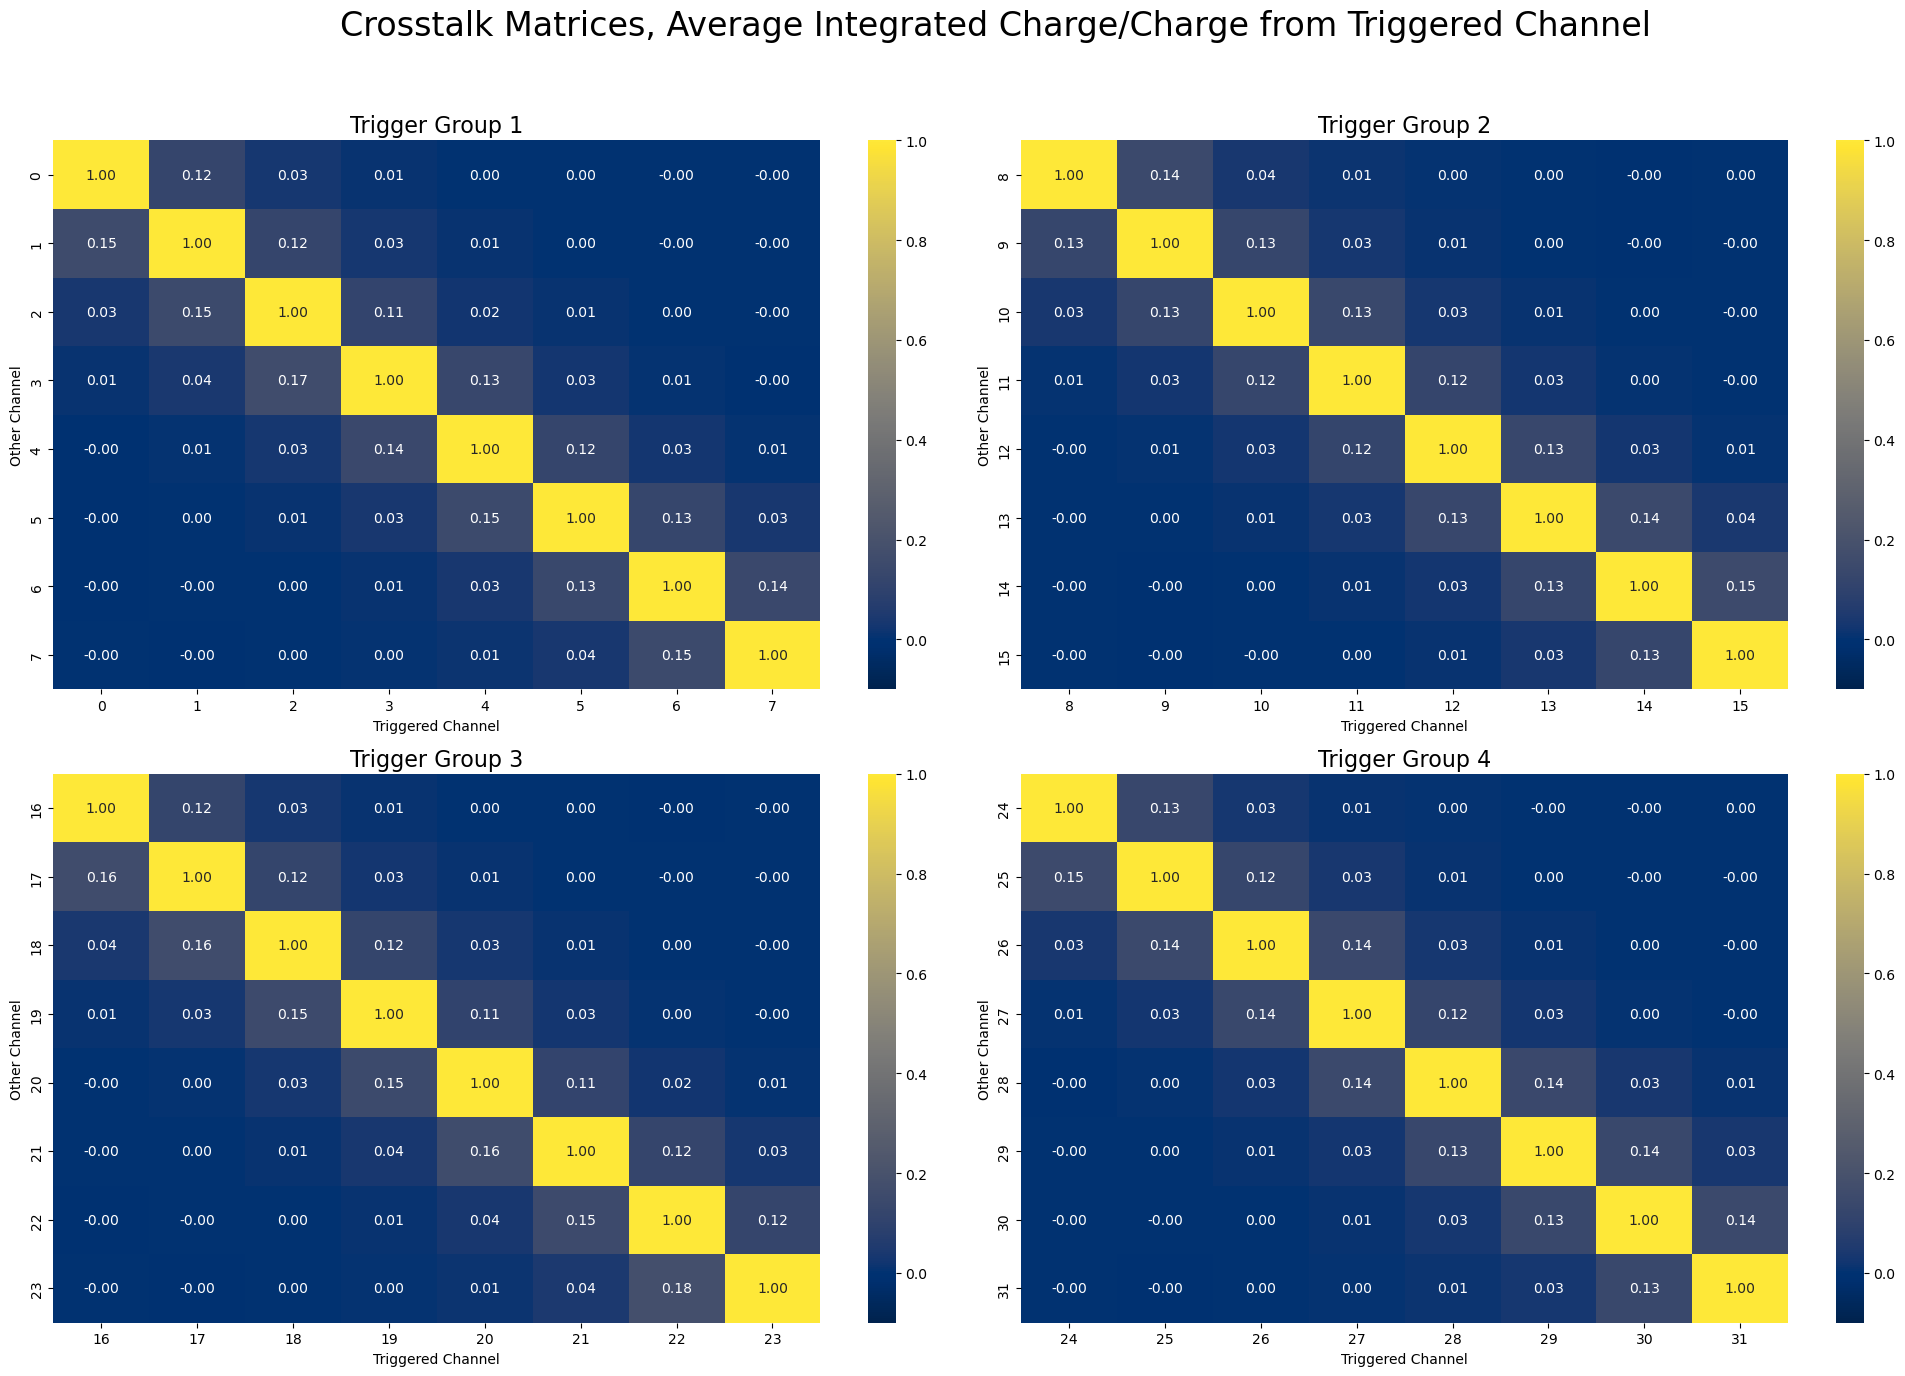

In [75]:

arrs = read_integral_hdf5s.getCrosstalkMatrcies_allFiles(hdf5List)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,14))


sns.heatmap(pd.DataFrame(arrs[0]), cmap='cividis', vmin=-0.1, vmax=1, annot=True, fmt=".2f", ax=ax[0,0])
ax[0,0].set_xlabel("Triggered Channel")
ax[0,0].set_ylabel("Other Channel")
ax[0,0].set_title("Trigger Group 1", fontsize=16)
#ax[0,0].yaxis.get_label().set_visible(True)


sns.heatmap(pd.DataFrame(arrs[1]), cmap='cividis', vmin=-0.1, vmax=1, annot=True, fmt=".2f", ax=ax[0,1])
ax[0,1].set_xlabel("Triggered Channel")
ax[0,1].set_ylabel("Other Channel")
ax[0,1].set_title("Trigger Group 2", fontsize=16)
ax[0,1].set_xticklabels(np.arange(8,16))
ax[0,1].set_yticklabels(np.arange(8,16))
#ax[0,1].set_xticks([8,16,1])


sns.heatmap(pd.DataFrame(arrs[2]), cmap='cividis', vmin=-0.1, vmax=1, annot=True, fmt=".2f", ax=ax[1,0])
ax[1,0].set_xlabel("Triggered Channel")
ax[1,0].set_ylabel("Other Channel")
ax[1,0].set_title("Trigger Group 3", fontsize=16)
ax[1,0].set_xticklabels(np.arange(16,24))
ax[1,0].set_yticklabels(np.arange(16,24))


sns.heatmap(pd.DataFrame(arrs[3]), cmap='cividis', vmin=-0.1, vmax=1, annot=True, fmt=".2f", ax=ax[1,1])
ax[1,1].set_xlabel("Triggered Channel")
ax[1,1].set_ylabel("Other Channel")
ax[1,1].set_title("Trigger Group 4", fontsize=16)
ax[1,1].set_xticklabels(np.arange(24,32))
ax[1,1].set_yticklabels(np.arange(24,32))

plt.suptitle("Crosstalk Matrices, Average Integrated Charge/Charge from Triggered Channel", fontsize=24, )
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()